## We have 3 datasets in the cell_data folder involving cell phone usage. <br/> We need to combine them to find out which cell phone models have the most average data usage per month




### 1) Merge the user\_device and user\_usage tables together

Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)

In [24]:
import pandas as pd
import numpy as np

In [25]:
user_device = pd.read_csv('cell_data/user_device.csv')

In [26]:
user_usage = pd.read_csv('cell_data/user_usage.csv')

In [27]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [28]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [34]:
user_usage_and_device_df = pd.merge(user_usage, user_device,  left_on = 'use_id', right_on = 'use_id', how = 'left')

In [35]:
user_usage_and_device_df.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0


In [30]:
android_devices = pd.read_csv('cell_data/android_devices.csv')

In [36]:
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [31]:
android_devices['Model'].value_counts()

LG-P970                23
LG-P920                20
LG-P990                20
LG-E510                19
LG-P690                14
TR10CS1                13
TR10CD1                10
FZ-N1                  10
LG-P990h               10
CT50                   10
Dolphin 70e Black      10
LG-E510g                9
HS-U980                 9
jupiter                 8
Infinix-X521            8
MotoG3                  7
Infinix_X521            7
LG-P698                 7
LG-E510f                7
LG-P920h                6
SUNNY                   6
VIDAA_TV                6
MY15ADA                 6
MediaPad 7 Vogue        6
NID_7010                6
HS-U939                 6
HTC One SV              5
HTC One M9              5
Infinix-X552            5
GT-I9300I               5
                       ..
R820                    1
Lenovo TAB 2 A7-30D     1
TIT-L01                 1
ESP_E301VE              1
SM-G530Y                1
LGL41C                  1
ATH-UL00                1
HUAWEI CRO-L

### 2) We want to analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv) and each brand ('Retail Branding' column in android\_devices.csv). 
Merge the dataframes appropriately to make this analysis possible. 
(Note: the 'device' column in user_device.csv has the same information as 'Model' in android\_devices.csv) 

In [15]:
final_df3 = usage_device_df.merge(android_devices, how = 'left', left_on = 'device', right_on = 'Model')

In [41]:
final_df3.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Device,Model
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0,Samsung,Galaxy S4,jflte,GT-I9505
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,herolte,SM-G930F
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,herolte,SM-G930F
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0,Sony,Xperia M2,D2303,D2303
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F


In [37]:
final_df = usage_device_df.merge(android_devices, how = 'left', left_on = 'device', right_on = 'Model').groupby('Marketing Name').mean()

In [39]:
final_df.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
Marketing Name,,,,,,,
Desire 510,797.06,7.6700,12562.4880,22815.00,23415.0,4.4,1.0
Desire 530,287.74,33.9700,1557.3300,22879.00,29664.0,6.0,1.0
Desire 626,250.87,149.3700,519.1200,22945.50,28962.0,6.0,1.0
Desire626,250.87,149.3700,519.1200,22945.50,28962.0,6.0,1.0
Galaxy A3,124.96,159.9125,1687.1125,22985.75,25785.0,5.6,1.0


### 3) Create 2 dataframes showing the following:

#### Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by monthly_mb.

##### Plot the monthly_mb information by brand


#### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by outgoing\_sms\_per\_month

##### Plot the outgoing\_sms\_per_month by phone model


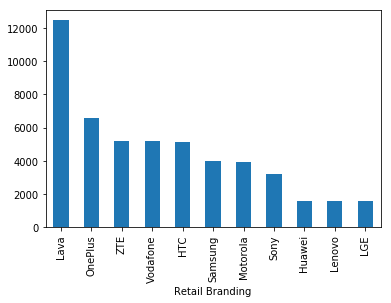

In [16]:
usage_device_df.merge(android_devices, how = 'left', left_on = 'device', right_on = 'Model').groupby('Retail Branding').mean()['monthly_mb'].sort_values(ascending = False).plot(kind = 'bar')



In [17]:
final_df3

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Device,Model
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0,Samsung,Galaxy S4,jflte,GT-I9505
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,herolte,SM-G930F
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0,Samsung,Galaxy S7,herolte,SM-G930F
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0,Sony,Xperia M2,D2303,D2303
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F
5,71.59,79.26,1557.33,22793,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F
6,71.59,79.26,519.12,22794,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F
7,71.59,79.26,519.12,22795,28217.0,android,5.1,SM-G361F,1.0,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F
8,30.92,22.77,3114.67,22799,29643.0,android,6.0,ONEPLUS A3003,1.0,NaN,NaN,NaN,NaN
9,69.80,14.70,25955.55,22801,10976.0,android,4.4,GT-I9505,1.0,Samsung,Galaxy S4,jflte,GT-I9505


In [30]:
final_df.sort_values(by = 'monthly_mb', ascending = False)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
Marketing Name,,,,,,,
Galaxy Note3,205.110000,273.750000,16611.550000,22891.000000,29670.000000,5.000000,1.0
OnePlus One,170.395000,62.100000,15573.330000,22822.500000,25635.000000,6.000000,1.0
HTC One mini 2,78.800000,327.330000,13842.956667,22820.333333,29651.000000,4.400000,1.0
HTC Desire 510,797.060000,7.670000,12562.488000,22815.000000,23415.000000,4.400000,1.0
Desire 510,797.060000,7.670000,12562.488000,22815.000000,23415.000000,4.400000,1.0
X11,60.650000,261.900000,12458.670000,23004.000000,18108.000000,4.400000,1.0
Galaxy Note2,16.340000,91.760000,11939.560000,22943.500000,29689.000000,4.100000,1.0
Galaxy Note4,152.142000,62.530000,8038.370000,22924.800000,19869.600000,6.000000,1.0
Galaxy S7,1161.240000,100.210000,7959.700000,22866.000000,28549.333333,6.000000,1.0


In [26]:
final_df['outgoing_sms_per_month'].sort_values(ascending=False)

Marketing Name
HTC One mini 2                  327.330000
Galaxy Note3                    273.750000
X11                             261.900000
Galaxy A3(2016)                 234.720000
Galaxy S7 Edge                  178.292000
Galaxy S6                       174.142000
Xperia Z                        162.390000
Galaxy A3                       159.912500
HTC One S                       150.590000
HTC ONE S                       150.590000
HTC Desire 626                  149.370000
HTC Desire626s                  149.370000
Desire626                       149.370000
Desire 626                      149.370000
Galaxy A5                       138.280000
Xperia Z3 Compact               105.950000
Galaxy S7                       100.210000
Galaxy S3                        97.140000
Galaxy Note2                     91.760000
Galaxy S5                        82.664667
Galaxy S4                        82.654667
Moto G(4) Plus                   81.555000
Moto G(4)                        81.555

In [32]:
usage_device_df_inner = pd.merge(user_usage, user_device,  left_on = 'use_id', right_on = 'use_id', how = 'inner')

In [33]:
final_df_inner = usage_device_df.merge(android_devices, how = 'inner', left_on = 'device', right_on = 'Model').groupby('Marketing Name').mean()


In [34]:
final_df_inner.sort_values(by = 'monthly_mb', ascending = False)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
Marketing Name,,,,,,,
Galaxy Note3,205.110000,273.750000,16611.550000,22891.000000,29670.000000,5.000000,1.0
OnePlus One,170.395000,62.100000,15573.330000,22822.500000,25635.000000,6.000000,1.0
HTC One mini 2,78.800000,327.330000,13842.956667,22820.333333,29651.000000,4.400000,1.0
HTC Desire 510,797.060000,7.670000,12562.488000,22815.000000,23415.000000,4.400000,1.0
Desire 510,797.060000,7.670000,12562.488000,22815.000000,23415.000000,4.400000,1.0
X11,60.650000,261.900000,12458.670000,23004.000000,18108.000000,4.400000,1.0
Galaxy Note2,16.340000,91.760000,11939.560000,22943.500000,29689.000000,4.100000,1.0
Galaxy Note4,152.142000,62.530000,8038.370000,22924.800000,19869.600000,6.000000,1.0
Galaxy S7,1161.240000,100.210000,7959.700000,22866.000000,28549.333333,6.000000,1.0
